In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
%set_env OCTAVE_EXECUTABLE=C:\Octave\octave-5.1.0-w64-64\mingw64\bin\octave.exe

env: OCTAVE_EXECUTABLE=C:\Octave\octave-5.1.0-w64-64\mingw64\bin\octave.exe


In [4]:
from oct2py import Oct2Py
oc = Oct2Py()

In [5]:
n_obj = 10
dim = 3
n_models = 5
k = 10

X = np.random.rand(n_obj, dim)
w = np.random.rand(dim, n_models)
pi = np.zeros(n_models)
pi[0] = pi[1] = 0.5

a = oc.generate_mixture_logistic(X, w, pi.reshape(-1, 1))
b = oc.generate_single_logistic(X, w[:, 0].reshape(-1, 1))

In [6]:
X, y, idx = oc.generate_syntethic_cluster(100, 2, 0, 1., 0, 0, nout = 3)
y = y.reshape(y.size)

In [7]:
_, w = oc.maximize_evidence_single_logistic_laplace(X, y.reshape(-1, 1), nout = 2)
w_single = w.reshape(2)

In [8]:
A, w, hess = oc.maximize_evidence_multilevel_logistic_laplace(X, y.reshape(-1, 1), idx, nout = 3)

In [9]:
w

Cell([array([[ 1.41267123],
       [-1.42570572]]),
       array([[ 1.04735635],
       [-1.01350295]])])

[ 1.41267123 -1.42570572]
[ 1.04735635 -1.01350295]


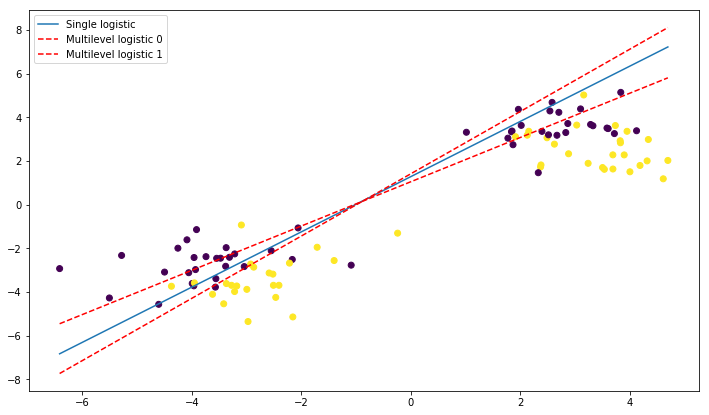

In [10]:
plt.figure(figsize = (12, 7))
plt.scatter(X[:, 0], X[:, 1], c = (y + 1) // 2)
grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)
plt.plot(grid, w_single[0] - w_single[1] * grid, label = 'Single logistic')
for i in range(2):
    w_part = w[i].reshape(2)
    print(w_part)
    plt.plot(grid, w_part[0] - w_part[1] * grid, label = 'Multilevel logistic ' + str(i), color = 'red',
             ls = '--')
plt.legend()
plt.show()

In [188]:
y_fake

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1])

In [189]:
y_fake = np.array([int(X[i][1] > 3) for i in range(X.shape[0])])
y_fake[y_fake == 0] = -1
y_fake

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1])

In [190]:
_, w = oc.maximize_evidence_single_logistic_laplace(X, y_fake.reshape(-1, 1), nout = 2)

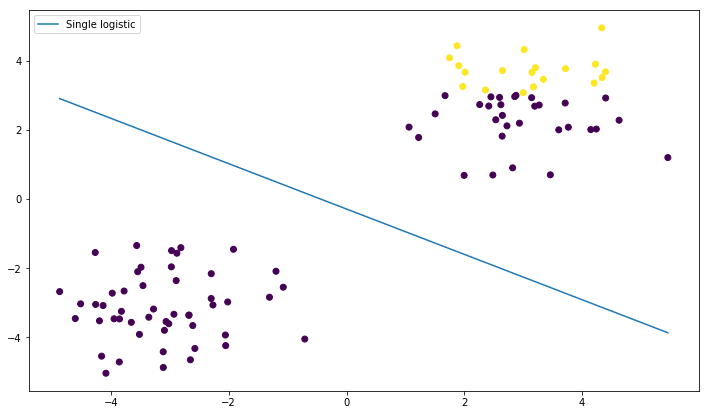

In [192]:
plt.figure(figsize = (12, 7))
plt.scatter(X[:, 0], X[:, 1], c = (y_fake + 1) // 2)
grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 500)
plt.plot(grid, w[0] - w[1] * grid, label = 'Single logistic')
plt.legend()
plt.show()